In [1]:
#Importing Req Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [17]:
#Importing Data
data = np.loadtxt(r"C:\Users\chinm\Desktop\python_train\InnoCentive\Data\data3.asc")
df = pd.DataFrame(data, columns = ['Lat','Lng','time','D','Intensity'])
df.head()
df.shape[0]

8680519

In [18]:
#Checking data quality
df.info()

# for col in df.columns:
#     print('{} : {}'.format(col,df[col].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680519 entries, 0 to 8680518
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Lat        float64
 1   Lng        float64
 2   time       float64
 3   D          float64
 4   Intensity  float64
dtypes: float64(5)
memory usage: 331.1 MB


<AxesSubplot:>

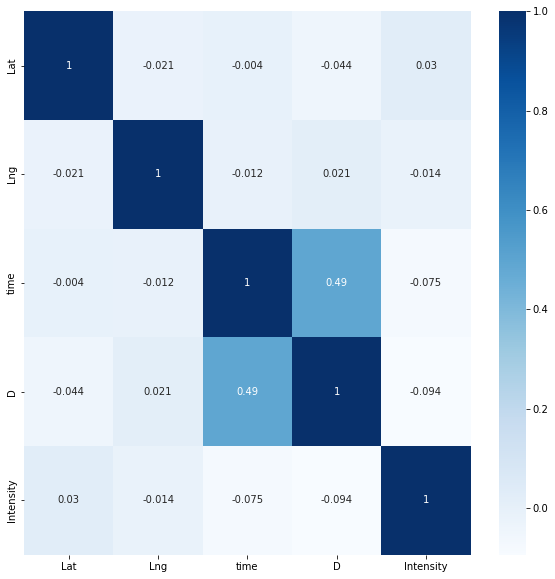

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

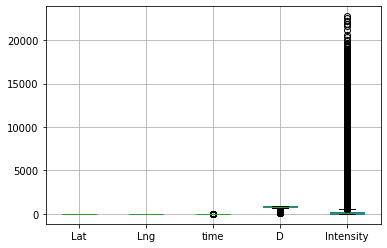

In [20]:
df.boxplot()#intensit has highest number of outliers

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Lat             0
Lng             0
time         4867
D               0
Intensity    1293
dtype: int64

In [21]:
df['Time']= pd.to_datetime(df['time'],unit='h')
df["ts_str"] = df["Time"].dt.strftime("%d-%b %H:%M:%S")
df['D'] = df['D'].apply(str)
df.update('"' + df[['D']].astype(str) + '"')
print(df.dtypes)
df.head() 

Lat                 float64
Lng                 float64
time                float64
D                    object
Intensity           float64
Time         datetime64[ns]
ts_str               object
dtype: object


,Lat,Lng,time,D,Intensity,Time,ts_str
0,8.8,-7.8,1.139261,"""174.0404""",18.0,1970-01-01 01:08:21.339600,01-Jan 01:08:21
1,8.8,-7.8,1.464764,"""175.0436""",45.0,1970-01-01 01:27:53.150400,01-Jan 01:27:53
2,8.8,-7.8,2.658276,"""794.568""",17.0,1970-01-01 02:39:29.793600,01-Jan 02:39:29
3,8.8,-7.8,2.821028,"""839.5618""",39.0,1970-01-01 02:49:15.700800,01-Jan 02:49:15
4,8.8,-7.8,2.875278,"""303.2316""",22.0,1970-01-01 02:52:31.000800,01-Jan 02:52:31


In [22]:
from keplergl import KeplerGl
map_1 = KeplerGl(height=800, data={'data_1':df})
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':           Lat  Lng      time           D  Intensity  \
0         8.8 -7.8  1.139261  …

In [ ]:
px.scatter_mapbox(
    df,
    lat="Lat",
    lon="Lng",
    color="Intensity",
    hover_data=["D"],
    animation_frame="ts_str",
).update_layout(
    mapbox={"style": "carto-positron", "zoom":11}, margin={"l": 0, "r": 0, "t": 0, "b": 0}
)

In [9]:
import pandas as pd
import numpy as np
data = np.loadtxt(r"C:\Users\chinm\Desktop\python_train\InnoCentive\Data\data3.asc")
df = pd.DataFrame(data, columns = ['Lat','Lng','time','D','Intensity'])
df.tail()

,Lat,Lng,time,D,Intensity
8680514,17.8,7.5,6.401562,738.5071,17.0
8680515,17.8,7.5,6.510063,751.5409,34.0
8680516,17.8,7.5,6.781316,836.5381,29.0
8680517,17.8,7.5,6.998318,873.4885,39.0
8680518,17.8,7.5,7.106819,873.4885,23.0


In [10]:
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show

output_notebook()

# Define general parameters for the Bokeh plot
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(990)
plot_height = int(plot_width//1.2)

options = dict(line_color=None, fill_color='blue', size=5)

Loading BokehJS ...

In [11]:
# Reusable function to create simple Bokeh plots

def base_plot(tools='pan,wheel_zoom,reset', plot_width=plot_width, plot_height=plot_height, **plot_kwargs):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        # x_range=x_range, y_range=y_range, 
        outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_kwargs)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    
    p.add_tools(BoxZoomTool(match_aspect=True))
    
    return p

In [14]:
from bokeh.tile_providers import get_provider, Vendors

samples = df.sample(n=10000)
p = base_plot()
tile_provider = get_provider(Vendors.CARTODBPOSITRON)
p.add_tile(tile_provider)
p.circle(x=samples['Lat'], y=samples['Lng'], **options)
show(p)

In [15]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

In [16]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)#, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'Lat', 'Lng',  ds.count('D'))
img = tf.shade(agg, cmap=["white", 'darkblue'], how='linear')

In [18]:
import numpy as np

# a histogram plotting function
def histogram(x, colors=None):
    hist,edges = np.histogram(x, bins=100)
    p = figure(y_axis_label="Pixels",
               tools='', height=130, outline_line_color=None,
               min_border=0, min_border_left=0, min_border_right=0,
               min_border_top=0, min_border_bottom=0)
    p.quad(top=hist[1:], bottom=0, left=edges[1:-1], right=edges[2:])
    print("min: {}, max: {}".format(np.min(x),np.max(x)))
    show(p)

In [19]:
histogram(agg.values)

min: 0, max: 2396


In [ ]:
import holoviews as hv, geoviews as gv, param, dask.dataframe as dd, cartopy.crs as crs
import panel as pn

from colorcet import cm
from holoviews.operation.datashader import rasterize, shade
from holoviews.streams import RangeXY

hv.extension('bokeh', logo=False)

usecols = ['dropoff_x','dropoff_y','pickup_x','pickup_y','dropoff_hour','pickup_hour','passenger_count']
df = dd.read_parquet('data/nyc_taxi_wide.parq')[usecols].persist()
opts = dict(width=1000,height=600,xaxis=None,yaxis=None,bgcolor='black',show_grid=False)
cmaps = ['fire','bgy','bgyw','bmy','gray','kbc']


class NYCTaxiExplorer(param.Parameterized):
    alpha      = param.Magnitude(default=0.75, doc="Alpha value for the map opacity")
    cmap       = param.ObjectSelector(cm['fire'], objects={c:cm[c] for c in cmaps})
    hour       = param.Range(default=(0, 24), bounds=(0, 24))
    location   = param.ObjectSelector(default='dropoff', objects=['dropoff', 'pickup'])

    @param.depends('location', 'hour')
    def points(self):
        points = hv.Points(df, kdims=[self.location+'_x', self.location+'_y'], vdims=['dropoff_hour'])
        if self.hour != (0, 24): points = points.select(dropoff_hour=self.hour)
        return points

    def view(self,**kwargs):
        points = hv.DynamicMap(self.points)
        tiles = gv.tile_sources.StamenTerrain().apply.opts(alpha=self.param.alpha, **opts)
        agg = rasterize(points, x_sampling=1, y_sampling=1, width=600, height=400)
        return tiles * shade(agg, cmap=self.param.cmap)

taxi = NYCTaxiExplorer(name="NYC Taxi Trips")
pn.Row(taxi.param, taxi.view()).servable()